In [1]:
%matplotlib notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
import scipy.stats as st
import numpy as np

In [2]:
# Character wealth CSV
character_wealth_df = pd.read_csv("character_wealth.csv")
character_wealth_df

,Name,Alter_ego,Franchise,Type,Net_worth,Income_source,Entity_name,Entity_type
0,Aquaman,Arthur Curry,DC,Hero,"$150,000,000,000,000",Monarch,Atlantis,Kingdom
1,Black Panther,T'Challa,Marvel,Hero,"$90,700,000,000,000",Monarch,Kingdom of Wakanda,Kingdom
2,Namor,Namor McKenzie,Marvel,Hero,"$260,000,000,000",Entrepreneur,Atlantis,Kingdom
3,Sunspot,Roberto da Costa,Marvel,Villain,"$125,000,000,000",Inheritance,NaN,NaN
4,Iron Man,Tony Stark,Marvel,Hero,"$100,000,000,000",Entrepreneur,Stark Industries,Multinational Conglomerate
5,Batman,Bruce Wayne,DC,Hero,"$80,000,000,000",Inheritance,Wayne Enterprises,Multinational Conglomerate
6,Lex Luthor,Alexander Luthor,DC,Villain,"$75,000,000,000",Entrepreneur,LexCorp,Multinational Conglomerate
7,Doctor Doom,Victor von Doom,Marvel,Villain,"$35,000,000,000",Monarch,Latveria,Kingdom
8,Kingpin,Wilson Fisk,Marvel,Villain,"$30,000,000,000",Entrepreneur,NaN,NaN
9,Black Adam,Theo Ramses Djoser Teth-Adam,DC,Villain,"$12,000,000,000",Monarch,Khandaq,Kingdom


In [3]:
# Show richest hero
hero_options = ["Type", "Hero"]
richest_hero = character_wealth_df[character_wealth_df["Type"].isin(hero_options)]
richest_hero

,Name,Alter_ego,Franchise,Type,Net_worth,Income_source,Entity_name,Entity_type
0,Aquaman,Arthur Curry,DC,Hero,"$150,000,000,000,000",Monarch,Atlantis,Kingdom
1,Black Panther,T'Challa,Marvel,Hero,"$90,700,000,000,000",Monarch,Kingdom of Wakanda,Kingdom
2,Namor,Namor McKenzie,Marvel,Hero,"$260,000,000,000",Entrepreneur,Atlantis,Kingdom
4,Iron Man,Tony Stark,Marvel,Hero,"$100,000,000,000",Entrepreneur,Stark Industries,Multinational Conglomerate
5,Batman,Bruce Wayne,DC,Hero,"$80,000,000,000",Inheritance,Wayne Enterprises,Multinational Conglomerate
11,Green Arrow,Oliver Queen,DC,Hero,"$7,000,000,000",Inheritance,Queen Consolidated,Multinational Conglomerate
13,Iron Fist,Daniel Rand,Marvel,Hero,"$5,000,000,000",Inheritance,Rand Enterprises,Multinational Conglomerate
14,Archangel,Warren Worthington III,Marvel,Hero,"$5,000,000,000",Inheritance,Worthington Industries,Multinational Conglomerate
15,Blue Beetle,Ted Kord,DC,Hero,"$5,000,000,000",Inheritance,Kord Enterprises,Multinational Conglomerate
17,Mister Fantastic,Reed Richards,Marvel,Hero,"$5,000,000,000",Entrepreneur,Fantastic Four Inc,NaN


In [4]:
# Show richest villain
villain_options = ["Type", "Villain"]
richest_villain = character_wealth_df[character_wealth_df["Type"].isin(villain_options)]
richest_villain

,Name,Alter_ego,Franchise,Type,Net_worth,Income_source,Entity_name,Entity_type
3,Sunspot,Roberto da Costa,Marvel,Villain,"$125,000,000,000",Inheritance,NaN,NaN
6,Lex Luthor,Alexander Luthor,DC,Villain,"$75,000,000,000",Entrepreneur,LexCorp,Multinational Conglomerate
7,Doctor Doom,Victor von Doom,Marvel,Villain,"$35,000,000,000",Monarch,Latveria,Kingdom
8,Kingpin,Wilson Fisk,Marvel,Villain,"$30,000,000,000",Entrepreneur,NaN,NaN
9,Black Adam,Theo Ramses Djoser Teth-Adam,DC,Villain,"$12,000,000,000",Monarch,Khandaq,Kingdom
10,Ozymandias,Adrian Veidt,DC,Villain,"$7,000,000,000",Entrepreneur,Veidt Enterprises,Multinational Conglomerate
12,Green Goblin,Noram Osborn,Marvel,Villain,"$5,000,000,000",Entrepreneur,Oscorp Industries,Multinational Conglomerate
16,Nighthawk,Kyle Richmond,Marvel,Villain,"$5,000,000,000",Inheritance,Richmond Enterprises,Multinational Conglomerate
18,Simon Stagg,Simon Stagg,DC,Villain,"$4,000,000,000",Entrepreneur,Stagg Industries,Multinational Conglomerate
21,White Queen,Emma Frost,Marvel,Villain,"$3,000,000,000",Inheritance,Frost International,Export and Trading


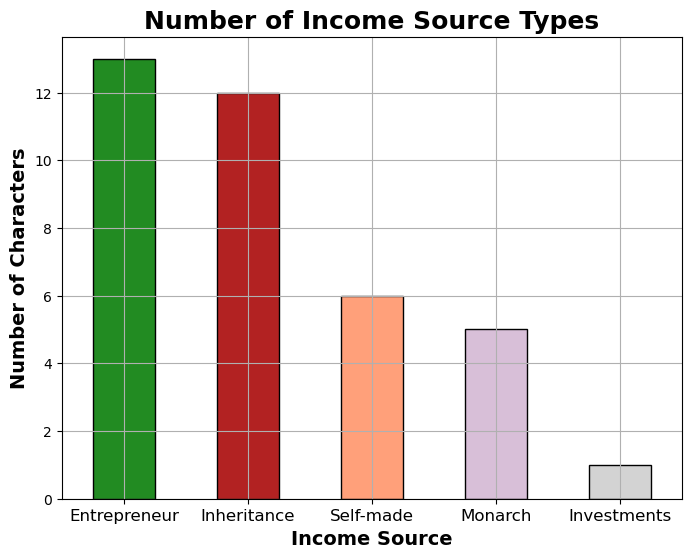

In [18]:
# Bar chart showing income source for number of characters
income_source_plot = character_wealth_df["Income_source"].value_counts()
income_source_plot.plot(kind = "bar", figsize = (8,6), color = ["forestgreen", "firebrick", "lightsalmon", "thistle","lightgray" ], edgecolor = "black")
plt.title ("Number of Income Source Types", fontweight = "bold", fontsize = 18)
plt.xlabel("Income Source", fontweight = "bold", fontsize = 14)
plt.ylabel("Number of Characters", fontweight = "bold", fontsize = 14)
plt.xticks(rotation = "0", fontsize = 12)
plt.grid()

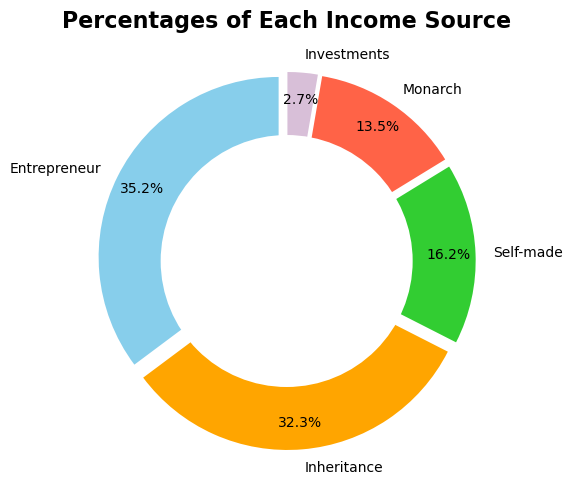

In [38]:
# Pie chart
labels = ["Entrepreneur", "Inheritance", "Self-made", "Monarch", "Investments"]
sizes = [35.1, 32.2, 16.2, 13.5, 2.7]
colors = ["skyblue", "orange", "limegreen", "tomato", "thistle"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
 
plt.pie(sizes, colors = colors, 
                        labels = labels,
                        autopct = "%1.1f%%", 
                        startangle = 90, 
                        pctdistance = 0.85, 
                        explode = explode)

centre_circle = plt.Circle((0,0),0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Percentages of Each Income Source", fontweight = "bold", fontsize = 16)
plt.show()